In [2]:
# Salary prediction using linear regression
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('/content/salary_prediction_data.csv')
df

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
...,...,...,...,...,...,...,...
995,High School,8,Suburban,Analyst,25,Female,64683.389864
996,High School,24,Urban,Engineer,30,Female,74468.205020
997,Master,18,Rural,Analyst,44,Male,98207.026024
998,Bachelor,27,Suburban,Director,31,Female,108544.922720


In [4]:
df.shape

(1000, 7)

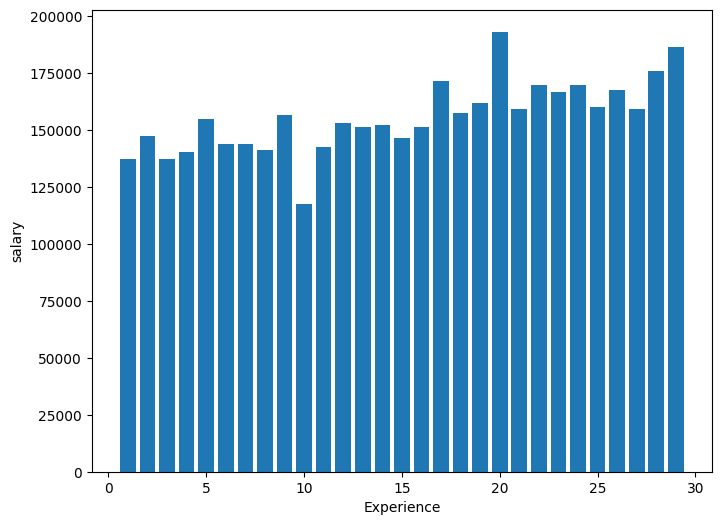

In [5]:
import matplotlib.pyplot as plt
df_sorted=df.sort_values('Experience')
plt.figure(figsize=(8,6))
plt.bar(df_sorted['Experience'],df_sorted['Salary'])
plt.xlabel("Experience")
plt.ylabel("salary")
plt.show()

In [7]:
# Sorting values based on experience
df_sort=df.sort_values('Experience')
df_sort

,Education,Experience,Location,Job_Title,Age,Gender,Salary
950,Master,1,Rural,Manager,59,Male,84075.942629
960,Master,1,Urban,Director,44,Female,121242.143101
386,High School,1,Rural,Director,58,Female,68583.468374
431,PhD,1,Rural,Analyst,42,Female,113050.811015
452,High School,1,Rural,Engineer,28,Female,37185.883493
...,...,...,...,...,...,...,...
357,Bachelor,29,Urban,Director,24,Male,117235.268456
378,Master,29,Suburban,Director,34,Male,132909.272682
385,Bachelor,29,Rural,Engineer,54,Male,107961.671937
975,Master,29,Suburban,Engineer,50,Female,118282.809665


In [8]:
# removing outliers
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[
    (df['Salary'] >= Q1 - 1.5 * IQR) &
    (df['Salary'] <= Q3 + 1.5 * IQR)
]

In [9]:
x=df.iloc[:,[1]].values
x

array([[ 8],
       [11],
       [28],
       [29],
       [25],
       [19],
       [ 4],
       [13],
       [20],
       [14],
       [23],
       [ 1],
       [11],
       [ 4],
       [ 7],
       [28],
       [ 4],
       [26],
       [ 7],
       [20],
       [ 3],
       [19],
       [19],
       [ 7],
       [21],
       [12],
       [23],
       [ 1],
       [ 5],
       [14],
       [10],
       [ 3],
       [ 2],
       [13],
       [16],
       [23],
       [ 2],
       [24],
       [13],
       [ 6],
       [ 7],
       [ 2],
       [11],
       [ 7],
       [ 7],
       [ 7],
       [ 7],
       [12],
       [19],
       [22],
       [19],
       [19],
       [20],
       [ 3],
       [13],
       [10],
       [20],
       [ 9],
       [ 6],
       [21],
       [22],
       [12],
       [ 2],
       [12],
       [16],
       [13],
       [16],
       [13],
       [22],
       [25],
       [19],
       [26],
       [14],
       [29],
       [13],
       [10],
       [22],

In [10]:
y=df.iloc[:,[6]].values       # no [] then 1d array , [] then 2d array
y

array([[ 84620.05366452],
       [142591.25589431],
       [ 97800.25540414],
       [ 96834.6712815 ],
       [132157.78617466],
       [156312.9362084 ],
       [130567.64945545],
       [148707.74075901],
       [ 95945.27542859],
       [133339.3896823 ],
       [101164.09236529],
       [124251.98714687],
       [ 55066.11435258],
       [124972.50876978],
       [126139.1367011 ],
       [ 81007.19945085],
       [ 60693.92471393],
       [103386.07028993],
       [140042.1389185 ],
       [ 86048.11608072],
       [ 73861.9929533 ],
       [106145.0055121 ],
       [142981.59047925],
       [ 96620.92938816],
       [ 89426.94711719],
       [104762.3985202 ],
       [101747.54077443],
       [ 68635.08828494],
       [ 90550.4794241 ],
       [ 75559.24411373],
       [ 87433.4986452 ],
       [ 57615.23341761],
       [126043.14343329],
       [ 73043.43575163],
       [134560.19300401],
       [ 95804.26144082],
       [ 99694.53954355],
       [153930.93385163],
       [1511

In [11]:
# sklearn is package , model selection is libray and train_test_split is function
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [12]:
x_train.shape

(750, 1)

In [13]:
x_train

array([[ 5],
       [27],
       [ 6],
       [ 4],
       [10],
       [ 3],
       [23],
       [ 8],
       [24],
       [13],
       [15],
       [13],
       [ 6],
       [17],
       [ 4],
       [14],
       [ 6],
       [13],
       [23],
       [ 3],
       [10],
       [ 4],
       [19],
       [18],
       [ 8],
       [12],
       [16],
       [26],
       [14],
       [ 6],
       [25],
       [27],
       [14],
       [20],
       [21],
       [ 6],
       [25],
       [20],
       [24],
       [27],
       [ 5],
       [25],
       [ 4],
       [ 1],
       [ 3],
       [17],
       [27],
       [ 3],
       [29],
       [23],
       [13],
       [22],
       [13],
       [ 4],
       [23],
       [ 9],
       [19],
       [25],
       [24],
       [23],
       [16],
       [22],
       [28],
       [ 3],
       [18],
       [ 8],
       [17],
       [14],
       [26],
       [22],
       [29],
       [ 1],
       [15],
       [16],
       [ 3],
       [22],
       [19],

In [14]:
x_test.shape

(250, 1)

In [15]:
y_train.shape

(750, 1)

In [16]:
y_test.shape

(250, 1)

In [17]:
# model creation
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(x_test)
y_pred

array([[115348.24882205],
       [115348.24882205],
       [118837.90558967],
       [108368.93528681],
       [ 94410.30821632],
       [106042.49744172],
       [ 89757.43252615],
       [109532.15420935],
       [ 94410.30821632],
       [109532.15420935],
       [118837.90558967],
       [ 97899.96498394],
       [116511.46774459],
       [107205.71636426],
       [121164.34343475],
       [100226.40282902],
       [ 94410.30821632],
       [ 99063.18390648],
       [ 96736.7460614 ],
       [ 96736.7460614 ],
       [ 92083.87037124],
       [114185.02989951],
       [ 92083.87037124],
       [ 90920.6514487 ],
       [108368.93528681],
       [104879.27851918],
       [ 96736.7460614 ],
       [ 95573.52713886],
       [ 97899.96498394],
       [101389.62175156],
       [118837.90558967],
       [ 96736.7460614 ],
       [ 95573.52713886],
       [109532.15420935],
       [ 90920.6514487 ],
       [101389.62175156],
       [109532.15420935],
       [106042.49744172],
       [ 944

In [19]:
y_test

array([[ 98276.76760253],
       [117342.18671454],
       [135962.90562632],
       [ 92184.8292578 ],
       [133712.64269615],
       [ 84080.91886528],
       [ 68635.08828494],
       [139034.76260984],
       [154677.29682143],
       [103473.04500041],
       [148185.15341038],
       [107652.04715249],
       [127318.7778506 ],
       [ 84841.86724581],
       [119772.32054397],
       [106028.63629377],
       [146305.24025865],
       [100622.23740615],
       [126139.1367011 ],
       [ 58008.87061573],
       [ 57615.23341761],
       [149741.55027515],
       [124594.39965062],
       [ 83967.79917322],
       [ 92373.80193359],
       [ 87266.49791623],
       [ 70251.76628382],
       [119140.33843647],
       [107515.28949272],
       [142591.25589431],
       [117630.38957755],
       [143623.63037382],
       [ 88826.78449165],
       [107141.4742482 ],
       [ 62915.44568326],
       [102655.89286955],
       [142528.77765517],
       [ 85339.36814956],
       [ 669

In [20]:
model.predict([[1]])

array([[89757.43252615]])

In [21]:
# Model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.11111890864425422


In [22]:
r2_perc=r2*100

In [23]:
r2_perc

11.111890864425423

In [24]:
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)
# mean absolute error

MAE: 23369.11090509323


In [25]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
# mean squared error

MSE: 749872565.5592191


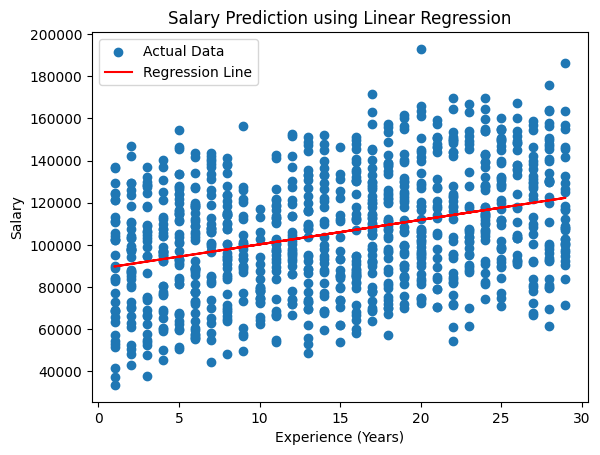

In [26]:
# Visualizing model
plt.scatter(x, y, label='Actual Data')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Salary Prediction using Linear Regression')
plt.legend()
plt.show()
# Explanation
# Dots → actual salary data
# Red line → predicted salary trend

In [27]:
model.coef_

array([[1163.21892254]])

In [28]:
model.intercept_

array([88594.21360361])

In [29]:
# y=mx+c
y1=1163.21892254*1+88594.21360361
y1

89757.43252615

In [ ]:
# 11% R² is common in real-world HR datasets.
# High R² is not mandatory — interpretation matters more.
# The low R² score indicates that experience alone does not sufficiently explain salary variation.
# To improve the model, additional features or a different model would be required.